<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/DR-mostafa/blob/main/DRmostafa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#to read csv files
import pandas as pd 

#to manipulate data
import numpy as np
import copy
#for ploting
import matplotlib.pyplot as plt
import seaborn as sns

#for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#for Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
ppg_one_beat = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                           names = np.arange(120))
ppg_10_beats = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/10_beat_signals/part_1_PPG_signals_10_beats_Aug_2022.csv",
                           names = np.arange(1024))
id = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Subj_ID_beats_P2P_Aug_2022.csv",names = ["ID"])
sys_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_SYS_BP_beats_P2P_Aug_2022.csv",
                     names = ["sys"])
dia_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Dia_BP_beats_P2P_Aug_2022.csv",
                     names = ["dia"])

In [6]:
df_info = pd.DataFrame()
 
df_info["dia"]  = dia_df
df_info["sys"]  = sys_df
df_info["ID"] = id
df_info["BP_class"] = np.random.randint(50,75,dia_df.shape[0])

In [7]:
df_info

,dia,sys,ID,BP_class
0,66.526,123.040,1,73
1,65.598,120.990,1,60
2,66.135,119.570,1,53
3,66.135,122.350,1,71
4,67.503,122.750,1,58
...,...,...,...,...
154535,58.357,88.240,3000,61
154536,58.983,88.240,3000,53
154537,58.670,86.988,3000,61
154538,58.044,88.866,3000,64


In [8]:
X = ppg_one_beat.values

In [9]:
y= copy.deepcopy(df_info["sys"].values)


In [ ]:
# we will divide data to classes for every 10 steps of systolic
for i in range(df_info.shape[0]):
  if y[i] < 75:
    df_info["BP_class"][i] = 0

  elif y[i] < 80:
    df_info["BP_class"][i] = 1

  elif y[i] < 85:
    df_info["BP_class"][i] = 2

  elif y[i] < 90:
    df_info["BP_class"][i] = 3

  elif y[i] < 95:
    df_info["BP_class"][i] = 4 

  elif y[i] < 100:
    df_info["BP_class"][i] = 5

  elif y[i] < 105:
    df_info["BP_class"][i] = 6

  elif y[i] < 110:
    df_info["BP_class"][i] = 7

  elif y[i] < 115:
    df_info["BP_class"][i] = 8

  elif y[i] < 120:
    df_info["BP_class"][i] = 9

  elif y[i] < 125:
    df_info["BP_class"][i] = 10

  elif y[i] < 130:
    df_info["BP_class"][i] = 11

  elif y[i] < 135:
    df_info["BP_class"][i] = 12
    
  elif y[i] < 140:
    df_info["BP_class"][i] = 13

  elif y[i] < 145:
    df_info["BP_class"][i] = 14

  elif y[i] < 150:
    df_info["BP_class"][i] = 15

  elif y[i] < 155:
    df_info["BP_class"][i] = 16   

  elif y[i] < 160:
    df_info["BP_class"][i] = 17 

  elif y[i] < 165:
    df_info["BP_class"][i] = 18

  elif y[i] < 170:
    df_info["BP_class"][i] = 19 

  elif y[i] < 175:
    df_info["BP_class"][i] = 20 

  elif y[i] < 180:
    df_info["BP_class"][i] = 21 

  elif y[i] < 185:
    df_info["BP_class"][i] = 22

  elif y[i] < 190:
    df_info["BP_class"][i] = 23

  elif y[i] < 195:
    df_info["BP_class"][i] = 24

  else:
    df_info["BP_class"][i] = 25

In [11]:
df_info.head()

,dia,sys,ID,BP_class
0,66.526,123.04,1,10
1,65.598,120.99,1,10
2,66.135,119.57,1,9
3,66.135,122.35,1,10
4,67.503,122.75,1,10


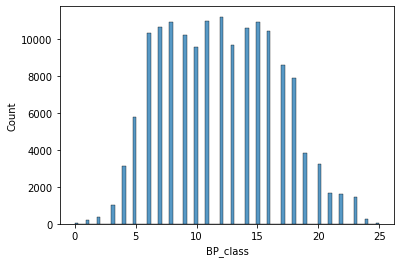

In [12]:
sns.histplot(df_info["BP_class"])

In [13]:
df_info["BP_class"].unique()

array([10,  9, 11, 12, 13, 14,  8, 15, 16,  7,  6, 20, 19, 18, 17, 21, 24,
       22, 23,  5,  4,  2,  3, 25,  1,  0])

In [14]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X, df_info["BP_class"].values)
X_lda_comp = lda.transform(X)

In [15]:
lda.explained_variance_ratio_

array([0.47862638, 0.16590726, 0.10899412])

In [16]:
X_lda_comp.shape

(154540, 3)

In [17]:
df_info['lda1'] = X_lda_comp[:,0]
df_info['lda2'] = X_lda_comp[:,1]
df_info['lda3'] = X_lda_comp[:,2]

In [18]:
df_info

,dia,sys,ID,BP_class,lda1,lda2,lda3
0,66.526,123.040,1,10,0.453605,0.358623,0.360732
1,65.598,120.990,1,10,0.377831,0.181590,0.366137
2,66.135,119.570,1,9,0.438901,0.431504,0.368855
3,66.135,122.350,1,10,0.307723,-0.044460,0.015344
4,67.503,122.750,1,10,0.285836,-0.277659,0.055454
...,...,...,...,...,...,...,...
154535,58.357,88.240,3000,3,-8.337391,7.187982,0.279741
154536,58.983,88.240,3000,3,-8.673451,6.208311,0.275946
154537,58.670,86.988,3000,3,-7.460531,5.262551,-0.821268
154538,58.044,88.866,3000,3,-8.630503,7.505161,0.103879


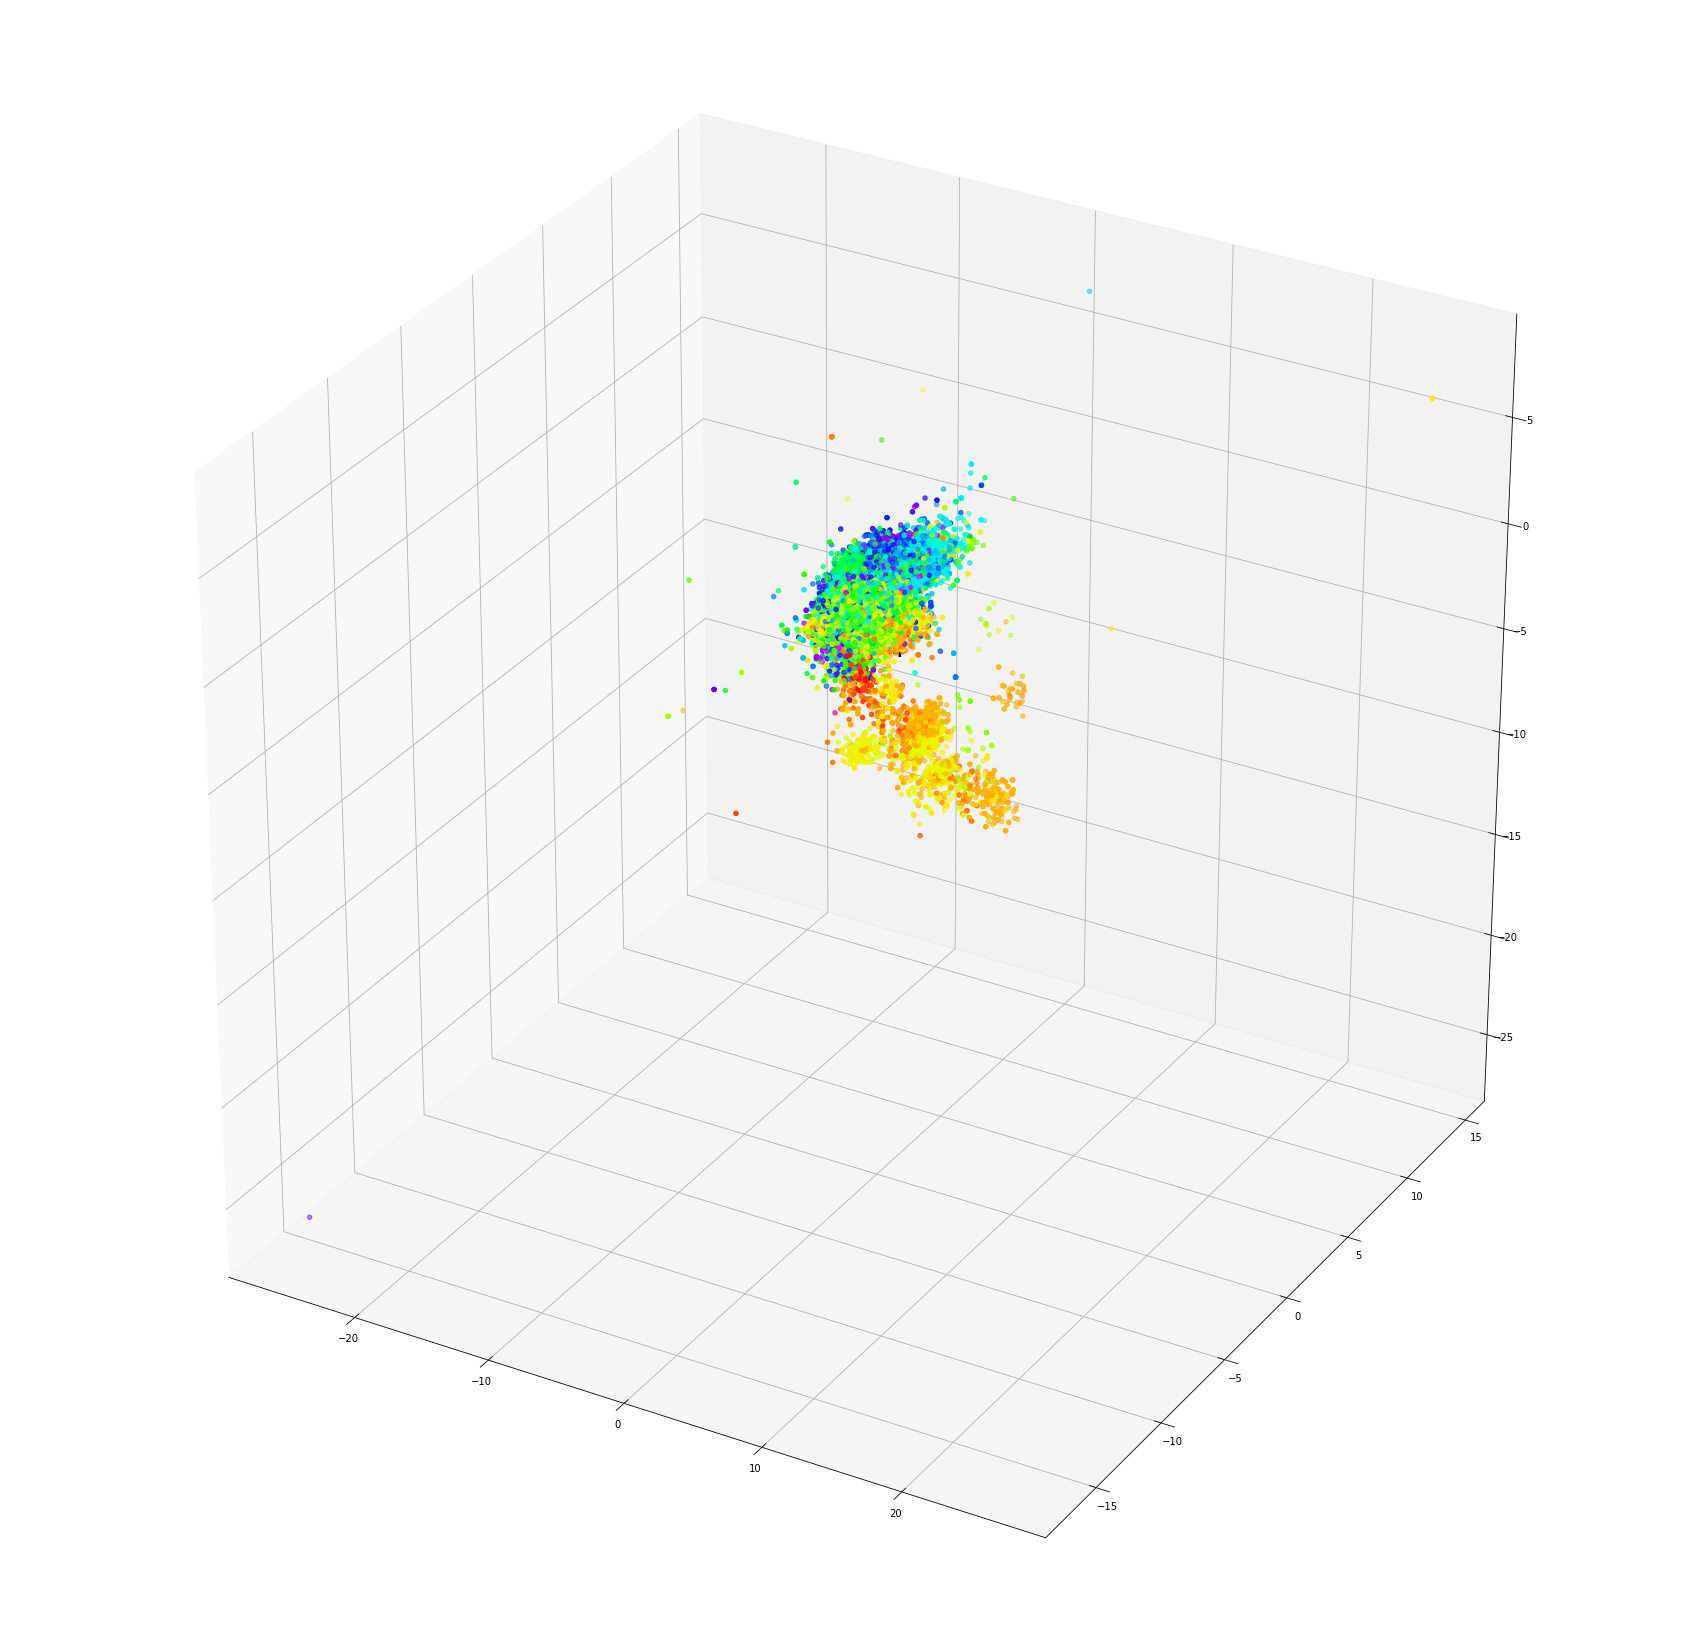

In [47]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
"""ax.set_xlim3d(-26, 27)
ax.set_ylim3d(-17, 25)
ax.set_zlim3d(-17, 10)"""
# Data for a three-dimensional line
zdata = df_info['lda1'].values
xdata = df_info['lda2'].values
ydata = df_info['lda3'].values
index = np.random.randint(0,zdata.shape[0],150000)
ax.scatter3D(xdata[index], ydata[index], zdata[index], c=df_info['BP_class'][index] ,cmap = 'gist_rainbow');



lda_means=df_info.groupby(['BP_class']).mean()
zdata = lda_means['lda1'].values
xdata = lda_means['lda2'].values
ydata = lda_means['lda3'].values
#ax.scatter3D(xdata, ydata, zdata, c=lda_means.index ,cmap = 'gist_rainbow');
for i in range(26):
    ax.plot([xdata[i]], [ydata[i]],[ zdata[i]], marker='${}$'.format(i),
            markersize=12, color='black')



In [20]:
lda_means=df_info.groupby(['BP_class']).mean()

In [21]:
lda_means

,dia,sys,ID,lda1,lda2,lda3
BP_class,,,,,,
0,53.543405,73.134238,2540.690476,-0.331876,2.354264,-3.250237
1,56.253368,78.713789,2369.766816,-0.150465,1.581631,-2.264416
2,56.283954,82.549312,1980.217765,-0.479819,1.127730,-1.599663
3,56.663497,87.884936,1532.463671,-1.157479,1.143336,-0.707259
4,58.398044,92.769594,1476.817256,-2.662389,1.206886,0.248322
5,58.803920,97.890116,1387.382210,-1.219715,-0.013486,0.200663
6,58.614177,102.542410,1379.796999,-0.878917,-0.529210,0.276953
7,60.501868,107.447908,1379.794322,-0.276945,-0.532942,0.000750
8,61.656454,112.533883,1333.218538,-0.208852,-0.355317,-0.245727


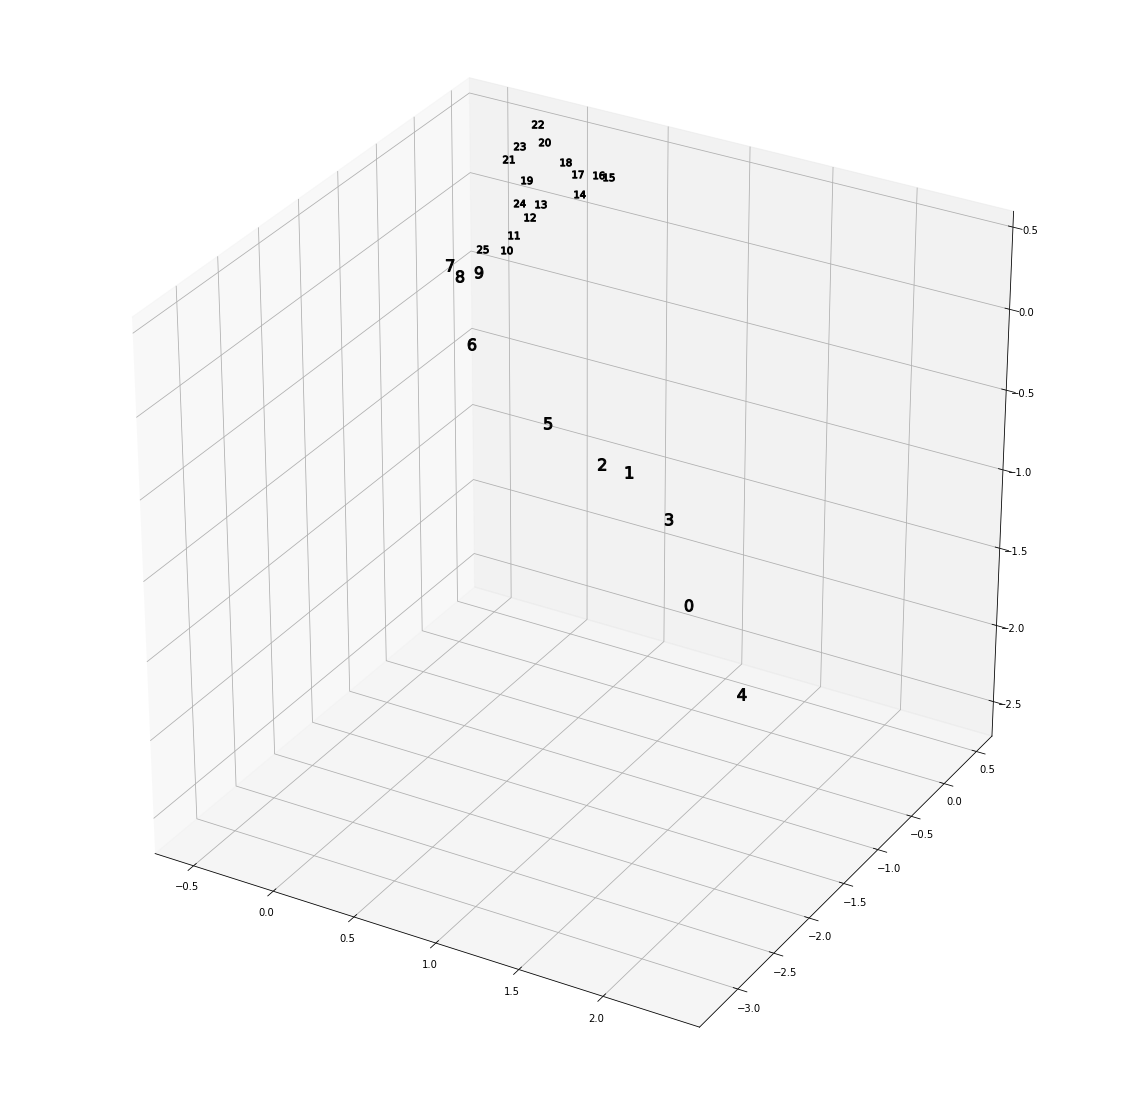

In [37]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
"""ax.set_xlim3d(-26, 27)
ax.set_ylim3d(-17, 25)
ax.set_zlim3d(-17, 10)"""
# Data for a three-dimensional line
zdata = lda_means['lda1'].values
xdata = lda_means['lda2'].values
ydata = lda_means['lda3'].values
#ax.scatter3D(xdata, ydata, zdata,marker = "${8}$" ,c=lda_means.index ,cmap = 'Dark2_r');
for i in range(26):
    ax.plot([xdata[i]], [ydata[i]],[ zdata[i]], marker='${}$'.format(i),
            markersize=12, color='black')

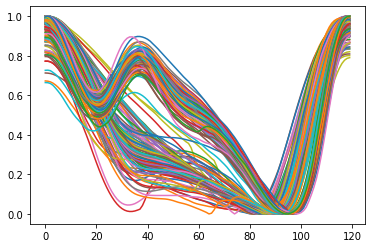

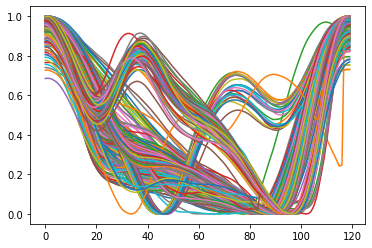

In [44]:
plt.plot(X[df_info["BP_class"] == 1].T);
plt.figure();
plt.plot(X[df_info["BP_class"] == 2].T);

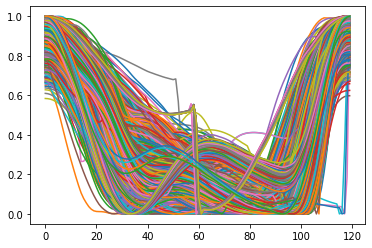

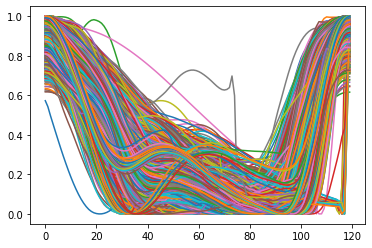

In [46]:
plt.plot(X[df_info["BP_class"] == 10].T);
plt.figure();
plt.plot(X[df_info["BP_class"] == 11].T);